In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import utils

%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set(font_scale=1.5, style="whitegrid")
sns.set_context('talk')
import matplotlib.style as style
style.use('ggplot')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
data = pd.read_csv("GHG_IPCC_Can_Prov_Terr.csv")
data.head()

,Year,Region,CategoryID,Source,Category,Sub-category,Sub-sub-category,Total,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),HFCs,PFCs,SF6,NF3,CO2eq,Unit
0,1990,Canada,110,Energy,Stationary Combustion Sources,Public Electricity and Heat Production,NaN,False,93982.35593,1.773294376,44.3323594,1.650737837,491.9198754,0,0,0,0,94518.60816,kt
1,1990,Canada,120,Energy,Stationary Combustion Sources,Petroleum Refining Industries,NaN,False,17300.2406,0.428833583,10.72083959,0.166112112,49.50140941,0,0,0,0,17360.46285,kt
2,1990,Canada,130,Energy,Stationary Combustion Sources,Oil and Gas Extraction,NaN,False,29098.29673,58.58394458,1464.598614,0.655721149,195.4049023,0,0,0,0,30758.30024,kt
3,1990,Canada,131,Energy,Stationary Combustion Sources,Mining,NaN,False,4625.538368,0.096105246,2.402631156,0.084963544,25.31913619,0,0,0,0,4653.260136,kt
4,1990,Canada,141,Energy,Stationary Combustion Sources,Manufacturing Industries,Iron and Steel,False,4904.693043,0.152364525,3.809113113,0.127260408,37.92360159,0,0,0,0,4946.425758,kt


### EDA

In [ ]:
data.columns

Index(['Year', 'Region', 'CategoryID', 'Source', 'Category', 'Sub-category',
       'Sub-sub-category', 'Total', 'CO2', 'CH4', 'CH4 (CO2eq)', 'N2O',
       'N2O (CO2eq)', 'HFCs', 'PFCs', 'SF6', 'NF3', 'CO2eq', 'Unit'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37825 entries, 0 to 37824
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              37825 non-null  int64 
 1   Region            37825 non-null  object
 2   CategoryID        37825 non-null  int64 
 3   Source            37825 non-null  object
 4   Category          35275 non-null  object
 5   Sub-category      24225 non-null  object
 6   Sub-sub-category  12325 non-null  object
 7   Total             37825 non-null  bool  
 8   CO2               37825 non-null  object
 9   CH4               37825 non-null  object
 10  CH4 (CO2eq)       37825 non-null  object
 11  N2O               37825 non-null  object
 12  N2O (CO2eq)       37825 non-null  object
 13  HFCs              37825 non-null  object
 14  PFCs              37825 non-null  object
 15  SF6               37825 non-null  object
 16  NF3               37825 non-null  object
 17  CO2eq       

In [ ]:
data.describe()

,Year,CategoryID
count,37825.000000,37825.000000
mean,2005.232941,348.808989
std,8.884729,185.751887
min,1990.000000,0.000000
25%,1998.000000,220.000000
50%,2005.000000,310.000000
75%,2013.000000,450.000000
max,2020.000000,760.000000


In [ ]:
data.dropna()

,Year,Region,CategoryID,Source,Category,Sub-category,Sub-sub-category,Total,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),HFCs,PFCs,SF6,NF3,CO2eq,Unit
4,1990,Canada,141,Energy,Stationary Combustion Sources,Manufacturing Industries,Iron and Steel,False,4904.693043,0.152364525,3.809113113,0.127260408,37.92360159,0,0,0,0,4946.425758,kt
5,1990,Canada,142,Energy,Stationary Combustion Sources,Manufacturing Industries,Non-Ferrous Metals,False,3295.313674,0.068901313,1.722532823,0.046320547,13.80352314,0,0,0,0,3310.83973,kt
6,1990,Canada,143,Energy,Stationary Combustion Sources,Manufacturing Industries,Chemical,False,8216.756063,0.165957782,4.148944558,0.142286775,42.401459,0,0,0,0,8263.306466,kt
7,1990,Canada,144,Energy,Stationary Combustion Sources,Manufacturing Industries,Pulp and Paper,False,14232.91059,1.487255858,37.18139644,0.723717723,215.6678814,0,0,0,0,14485.75987,kt
8,1990,Canada,145,Energy,Stationary Combustion Sources,Manufacturing Industries,Cement,False,3957.736998,0.115250981,2.88127452,0.045565342,13.57847191,0,0,0,0,3974.196744,kt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37725,2020,Alberta,241,Energy,Transport,Marine,Domestic Navigation,False,0,0,0,0,0,0,0,0,0,0,kt
37751,2020,Yukon,228,Energy,Transport,Road Transportation,Propane and Natural Gas Vehicles,False,0,0,0,0,0,0,0,0,0,0,kt
37776,2020,Northwest Territories,228,Energy,Transport,Road Transportation,Propane and Natural Gas Vehicles,False,0,0,0,0,0,0,0,0,0,0,kt
37801,2020,Nunavut,228,Energy,Transport,Road Transportation,Propane and Natural Gas Vehicles,False,0,0,0,0,0,0,0,0,0,0,kt


In [ ]:
df1 = data[['Year', 'Region', 'Sub-sub-category','CO2', 'CH4', 'CH4 (CO2eq)', 'N2O', 'N2O (CO2eq)', 'CO2eq']]
df1.head()

,Year,Region,Sub-sub-category,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),CO2eq
0,1990,Canada,NaN,93982.35593,1.773294376,44.3323594,1.650737837,491.9198754,94518.60816
1,1990,Canada,NaN,17300.2406,0.428833583,10.72083959,0.166112112,49.50140941,17360.46285
2,1990,Canada,NaN,29098.29673,58.58394458,1464.598614,0.655721149,195.4049023,30758.30024
3,1990,Canada,NaN,4625.538368,0.096105246,2.402631156,0.084963544,25.31913619,4653.260136
4,1990,Canada,Iron and Steel,4904.693043,0.152364525,3.809113113,0.127260408,37.92360159,4946.425758


In [ ]:
df1 = df1.dropna()

In [ ]:
df1

,Year,Region,Sub-sub-category,CO2,CH4,CH4 (CO2eq),N2O,N2O (CO2eq),CO2eq
4,1990,Canada,Iron and Steel,4904.693043,0.152364525,3.809113113,0.127260408,37.92360159,4946.425758
5,1990,Canada,Non-Ferrous Metals,3295.313674,0.068901313,1.722532823,0.046320547,13.80352314,3310.83973
6,1990,Canada,Chemical,8216.756063,0.165957782,4.148944558,0.142286775,42.401459,8263.306466
7,1990,Canada,Pulp and Paper,14232.91059,1.487255858,37.18139644,0.723717723,215.6678814,14485.75987
8,1990,Canada,Cement,3957.736998,0.115250981,2.88127452,0.045565342,13.57847191,3974.196744
...,...,...,...,...,...,...,...,...,...
37725,2020,Alberta,Domestic Navigation,0,0,0,0,0,0
37751,2020,Yukon,Propane and Natural Gas Vehicles,0,0,0,0,0,0
37776,2020,Northwest Territories,Propane and Natural Gas Vehicles,0,0,0,0,0,0
37801,2020,Nunavut,Propane and Natural Gas Vehicles,0,0,0,0,0,0


### Feature Engineering ###

In [ ]:
df1['CO2'].isna().sum()

0

In [ ]:
df1 = df1[df1['CO2'].str.contains('x')==False]
df1 = df1[df1['CO2eq'].str.contains('x')==False]

In [ ]:
df1.columns

Index(['Year', 'Region', 'Sub-sub-category', 'CO2', 'CH4', 'CH4 (CO2eq)',
       'N2O', 'N2O (CO2eq)', 'CO2eq'],
      dtype='object')

In [ ]:
df1 = df1.astype({'CO2':'float','CH4':'float', 'CH4 (CO2eq)':'float', 'N2O':'float', 'N2O (CO2eq)':'float', 'CO2eq':'float'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12254 entries, 4 to 37803
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              12254 non-null  int64  
 1   Region            12254 non-null  object 
 2   Sub-sub-category  12254 non-null  object 
 3   CO2               12254 non-null  float64
 4   CH4               12254 non-null  float64
 5   CH4 (CO2eq)       12254 non-null  float64
 6   N2O               12254 non-null  float64
 7   N2O (CO2eq)       12254 non-null  float64
 8   CO2eq             12254 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 957.3+ KB


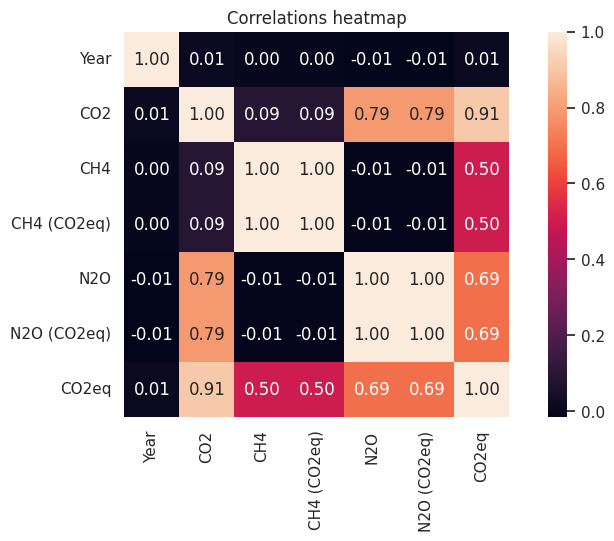

In [ ]:
#Numerical columns to find out correlation
cols = ['Year','CO2', 'CH4', 'CH4 (CO2eq)', 'N2O', 'N2O (CO2eq)', 'CO2eq']

#Find out correlation between columns and plot
corrs = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1)
plt.figure(figsize=(10,5))
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')
plt.show()

<h2> Exploring parameter settings using GridSearchCV on Random Forest & Gradient Boosting Classifier. </h2>
Use Xgboost instead of Gradient Boosting if it's taking a very long time in
GridSearchCV

In [ ]:
# mapping = {'Quebec': 1, 'Alberta': 2, 'Ontario': 3, 'British Columbia': 4, 'New Brunswick': 5, 'Saskatchewan': 6, 'Manitoba': 7
#            , 'Nova Scotia': 8, 'Newfoundland and Labrador': 9, 'Prince Edward Island': 10, 'Northwest Territories': 11
#            , 'Nunavut': 12, 'Yukon': 13}
# df1['map_province'] = df1['province'].map(mapping)
# df1

In [ ]:
df1.columns = ['year', 'region', 'industry', 'co2', 'ch4', 'ch4(co2eq)', 'n2o', 'n2o(co2eq)', 'total_emissions']


In [ ]:
df1.head()

,year,region,industry,co2,ch4,ch4(co2eq),n2o,n2o(co2eq),total_emissions
4,1990,Canada,Iron and Steel,4904.693043,0.152365,3.809113,0.127260,37.923602,4946.425758
5,1990,Canada,Non-Ferrous Metals,3295.313674,0.068901,1.722533,0.046321,13.803523,3310.839730
6,1990,Canada,Chemical,8216.756063,0.165958,4.148945,0.142287,42.401459,8263.306466
7,1990,Canada,Pulp and Paper,14232.910590,1.487256,37.181396,0.723718,215.667881,14485.759870
8,1990,Canada,Cement,3957.736998,0.115251,2.881275,0.045565,13.578472,3974.196744


In [ ]:
df1 = df1[df1.total_emissions != 0]
df1.tail()

,year,region,industry,co2,ch4,ch4(co2eq),n2o,n2o(co2eq),total_emissions
23422,1998,Northwest Territories and Nunavut,Off-Road Other Transportation,37.417786,0.064480,1.611994,0.000348,0.103744,39.133524
23425,1998,Northwest Territories and Nunavut,Oil,0.018394,0.160164,4.004101,0.000000,0.000000,4.022496
23426,1998,Northwest Territories and Nunavut,Natural Gas,0.001333,0.032667,0.816669,0.000000,0.000000,0.818002
23427,1998,Northwest Territories and Nunavut,Venting,0.012431,0.059482,1.487050,0.000000,0.000000,1.499482
23428,1998,Northwest Territories and Nunavut,Flaring,3.883405,0.006883,0.172086,0.000002,0.000722,4.056213


In [ ]:
df1_total = df1[['year', 'total_emissions']]
df1_total.head()

,year,total_emissions
4,1990,4946.425758
5,1990,3310.839730
6,1990,8263.306466
7,1990,14485.759870
8,1990,3974.196744


In [ ]:
df1_total = df1_total.groupby('year', as_index=False, sort=False)['total_emissions'].mean()
df1_total

,year,total_emissions
0,1990,1425.314919
1,1991,1366.409762
2,1992,1418.807413
3,1993,1431.852075
4,1994,1504.449215
5,1995,1547.917995
6,1996,1659.998220
7,1997,1701.265809
8,1998,1738.339999
9,1999,1681.094803


In [ ]:
df1_total.index = df1_total['year']
df1_total = df1_total.drop('year', axis = 1)
df1_total

,total_emissions
year,
1990,1425.314919
1991,1366.409762
1992,1418.807413
1993,1431.852075
1994,1504.449215
1995,1547.917995
1996,1659.998220
1997,1701.265809
1998,1738.339999


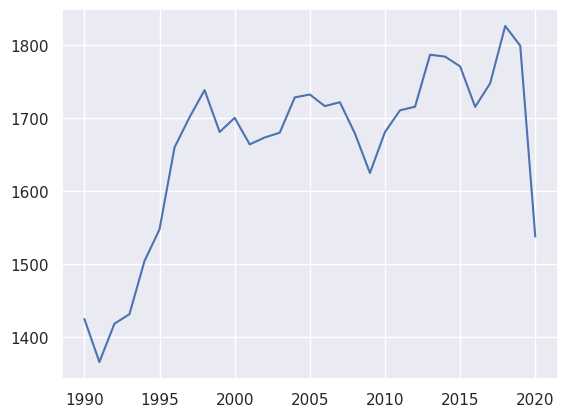

In [ ]:
plt.plot(df1_total["total_emissions"],label='Total Emissions')

In [ ]:
# final_data = df1.values
# train_data = final_data[0:25,:]
# valid_data = final_data[25:,:]
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(final_data)
# x_train, y_train = [],[]
# for i in range(5,len(train_data)):
#     x_train.append(scaled_data[i-5:i,0])
#     y_train.append(scaled_data[i,0])

# x_train

In [ ]:
# y_train

In [ ]:
# lstm_model=Sequential()
# lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train)[1],1)))
# lstm_model.add(LSTM(units=50))
# lstm_model.add(Dense(1))
# model_data=df1[len(df1)-len(valid_data)-5:].values
# model_data=model_data.reshape(-1,1)
# model_data=scaler.transform(model_data)

In [ ]:
# lstm_model.compile(loss='mean_squared_error',optimizer='adam')
# lstm_model.fit(x_train,y_train,epochs=1,batch_size=1,verbose=2)
# X_test=[]
# for i in range(5,model_data.shape[0]):
#     X_test.append(model_data[i-5:i,0])
# X_test=np.array(X_test)
# X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df1_total, order=(2, 0, 1))
results = model.fit()
results.summary()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        total_emissions   No. Observations:                   31
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -172.119
Date:                Mon, 10 Apr 2023   AIC                            354.238
Time:                        18:42:02   BIC                            361.408
Sample:                             0   HQIC                           356.576
                                 - 31                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1628.1788     60.104     27.089      0.000    1510.377    1745.980
ar.L1          1.1930      0.702      1.698      0.089      -0.184       2.570
ar.L2         -0.4017      0.621     -0.647      0.518      -1.618       0.815
ma.L1          0.0714      0.728      0.098      0.922      -1.356       1.499
sigma2      3670.8238   1174.385      3.126      0.002    1369.071    5972.577
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.35
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                            -1.33
Prob(H) (two-sided):                  0.21   Kurtosis:                         6.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# make prediction
predictions = results.predict(len(df1_total), 40)
print(predictions)

31    1436.722533
32    1436.014046
33    1475.837489
34    1523.629999
35    1564.648429
36    1594.384605
37    1613.382477
38    1624.101804
39    1629.258497
40    1631.104498
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
#results.forecast(10)


In [ ]:
# from statsmodels.graphics.tsaplots import plot_predict
# fig, ax = plt.subplots()
# ax = df1.loc[2015:].plot(ax=ax)
# plot_predict(results, 2015, 2025, ax=ax)
# plt.show()


In [ ]:
df1_province = df1[['year', 'region' ,'total_emissions']]
df1_province.head()

,year,region,total_emissions
4,1990,Canada,4946.425758
5,1990,Canada,3310.839730
6,1990,Canada,8263.306466
7,1990,Canada,14485.759870
8,1990,Canada,3974.196744


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


31    2321.552898
32    2353.388867
33    2392.689941
34    2435.954867
35    2480.078204
36    2522.453453
37    2561.030261
38    2594.330617
39    2621.430334
40    2641.912982
Name: predicted_mean, dtype: float64


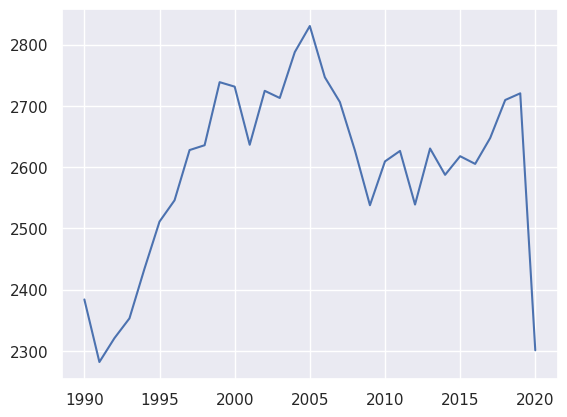

In [ ]:
df1_province_ontario = df1_province[df1_province['region'].str.contains('Ontario')]
df1_province_ontario
df1_province_ontario = df1_province_ontario.groupby('year', as_index=False, sort=False)['total_emissions'].mean()

df1_province_ontario.index = df1_province_ontario['year']
df1_province_ontario = df1_province_ontario.drop('year', axis = 1)

plt.plot(df1_province_ontario["total_emissions"],label='Total Emissions')

from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df1_province_ontario, order=(2, 0, 1))
results = model.fit()
#results.summary()

# make prediction
predictions = results.predict(len(df1_province_ontario), 40)
print(predictions)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

31    2723.228953
32    2732.867616
33    2726.038837
34    2723.293133
35    2720.093319
36    2717.384859
37    2714.920841
38    2712.718863
39    2710.742524
40    2708.970572
Name: predicted_mean, dtype: float64


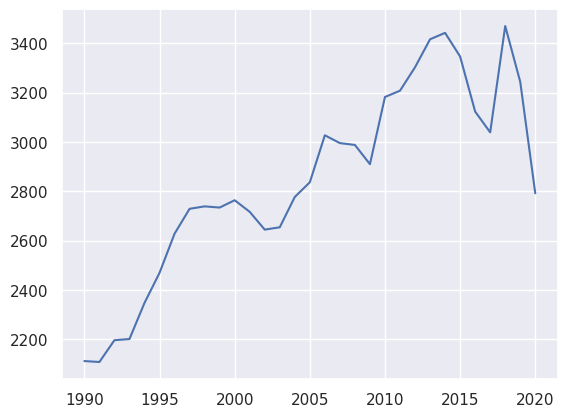

In [ ]:
df1_province_alberta = df1_province[df1_province['region'].str.contains('Alberta')]
df1_province_alberta
df1_province_alberta = df1_province_alberta.groupby('year', as_index=False, sort=False)['total_emissions'].mean()

df1_province_alberta.index = df1_province_alberta['year']
df1_province_alberta = df1_province_alberta.drop('year', axis = 1)

plt.plot(df1_province_alberta["total_emissions"],label='Total Emissions')

from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df1_province_alberta, order=(2, 0, 1))
results = model.fit()
#results.summary()

# make prediction
predictions = results.predict(len(df1_province_alberta), 40)
print(predictions)

      year  industry  total_emissions
6     1990  Chemical      8263.306466
20    1990  Chemical         7.811701
129   1990  Chemical       555.186399
144   1990  Chemical      2252.151770
159   1990  Chemical       113.020156
...    ...       ...              ...
6028  2020  Chemical      2309.411724
6043  2020  Chemical       431.836981
6058  2020  Chemical       563.745591
6073  2020  Chemical      5189.504695
6088  2020  Chemical        52.308910

[274 rows x 3 columns]
      total_emissions
year                 
1990      2065.826616
1991      2471.901849
1993      2436.606177
1992      2457.817694
1994      2502.391353
1995      2573.136862
1996      2834.950035
1997      2921.738079
1998      3089.154812
1999      3183.463063
2000      3038.057614
2001      2694.045686
2002      2564.457181
2003      2314.460422
2004      2542.287829
2005      2064.025099
2006      1757.214760
2007      1568.644525
2008      1587.031437
2009      1765.801248
2010      1794.680589
2011      2460

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

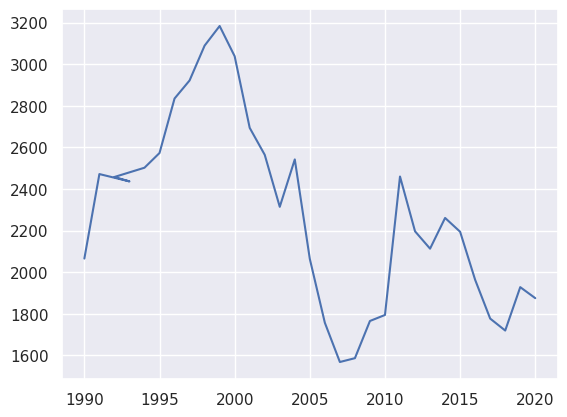

In [ ]:
df1_industry = df1[['year', 'industry' ,'total_emissions']]
df1_industry.head()

df1_industry_chemical = df1_industry[df1_industry['industry'].str.contains('Chemical')]
print(df1_industry_chemical)
df1_industry_chemical = df1_industry_chemical.groupby('year', as_index=False, sort=False)['total_emissions'].mean()

df1_industry_chemical.index = df1_industry_chemical['year']
df1_industry_chemical = df1_industry_chemical.drop('year', axis = 1)

plt.plot(df1_industry_chemical["total_emissions"],label='Total Emissions')
print(df1_industry_chemical)
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df1_industry_chemical, order=(2, 0, 1))
results = model.fit()
#results.summary()

# make prediction
predictions = results.predict(len(df1_industry_chemical), 40)
print(predictions)